In [1]:
# =============================
# Task 2: Customer Segmentation
# =============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
# -----------------------------
# 1. Load dataset
# -----------------------------
data = pd.read_csv("Mall_Customers.csv")

In [4]:
print("Dataset head:")
print(data.head())

Dataset head:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# -----------------------------
# 2. Exploratory Data Analysis
# -----------------------------
print("\nBasic info:")
print(data.info())
print("\nSummary stats:")
print(data.describe())


Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary stats:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50% 

In [15]:
data = data.rename(columns={
    "Genre": "Gender"   
})

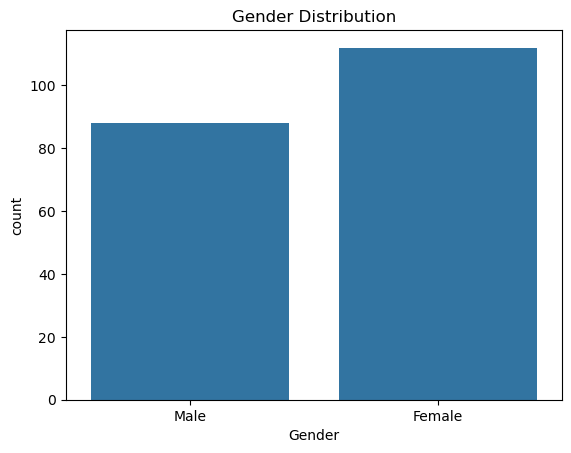

In [17]:
# Gender distribution
sns.countplot(data=data, x="Gender")
plt.title("Gender Distribution")
plt.show()

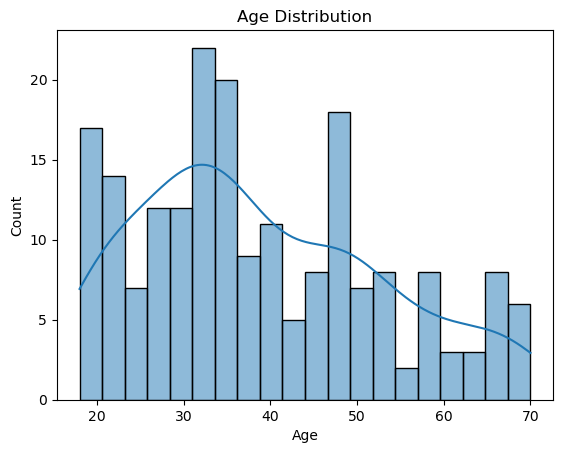

In [18]:
# Age distribution
sns.histplot(data["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

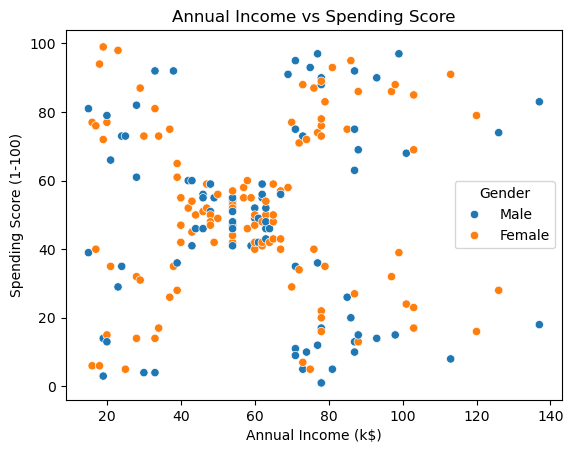

In [19]:
# Income vs Spending Score
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
plt.title("Annual Income vs Spending Score")
plt.show()

In [20]:
# -----------------------------
# 3. Prepare Data for Clustering
# -----------------------------
X = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\bless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

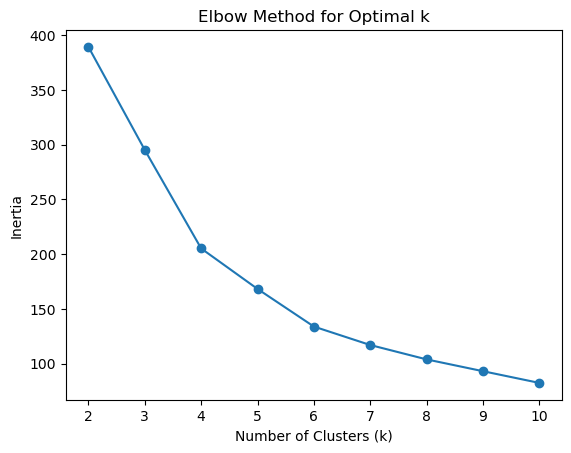

C:\Users\bless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
# -----------------------------
# 4. Apply K-Means
# -----------------------------
# Elbow method to find optimal k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Let's assume k=5 (commonly used for this dataset)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

data["Cluster"] = clusters

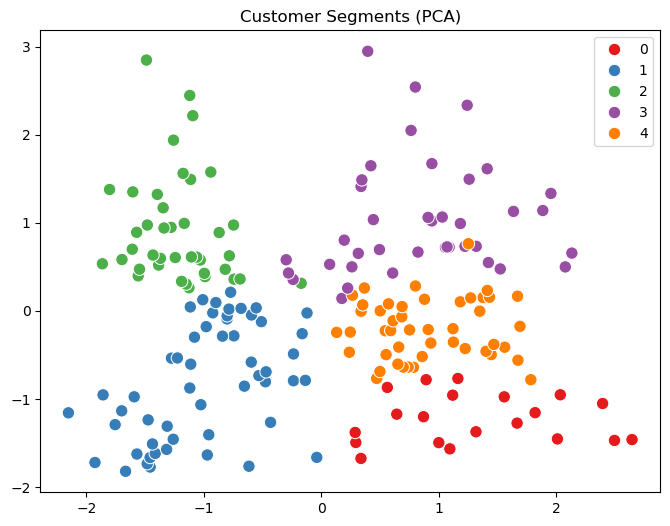

In [22]:
# -----------------------------
# 5. Visualization with PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set1", s=80)
plt.title("Customer Segments (PCA)")
plt.show()

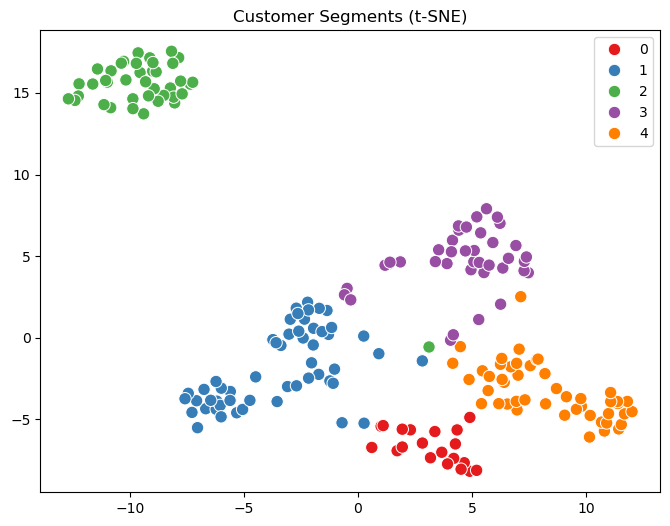

In [23]:
# -----------------------------
# 6. Visualization with t-SNE
# -----------------------------
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=clusters, palette="Set1", s=80)
plt.title("Customer Segments (t-SNE)")
plt.show()

In [24]:
# -----------------------------
# 7. Analyze Segments
# -----------------------------
print("\nCluster Characteristics:")
print(data.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean())


Cluster Characteristics:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064
